# Pandas II: Data Wrangling

In [4]:
import pandas as pd

# for warnings
import warnings
warnings.filterwarnings('ignore')

## Understanding `axis` in pandas
- **`axis = 0`**: apply function **DOWN** (column-wise, default) -- affects all columns
- **`axis = 1`**: apply function **ACROSS** (row-wise, across columns) -- affects all rows
    - **axis=1** means you're working with 1 row at a time

## Dataset inspection
- Use real_estate_1 dataset (csv) and inspect the dataset

In [4]:
data_1 = pd.read_csv('real_estate_1.csv')
data_1.head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Miguel Hidalgo|Distrito Federal|México|,"23.634501,-102.552788",5500000.0,MXN,5450245.50,289775.66,NaN,54.0,NaN,101851.851900,NaN,NaN,NaN,http://miguel-hidalgo-df.properati.com.mx/o3zb...
1,sell,house,|Iztapalapa|Distrito Federal|México|,"19.31033,-99.068557",1512000.0,MXN,1498321.97,79661.96,NaN,80.0,NaN,18900.000000,NaN,NaN,NaN,http://iztapalapa.properati.com.mx/q7t0_venta_...
2,sell,apartment,|Tlalpan|Distrito Federal|México|,"19.279771,-99.234597",926667.0,MXN,918284.00,48822.82,NaN,100.0,NaN,9266.670000,NaN,NaN,NaN,http://tlalpan.properati.com.mx/qbi4_venta_dep...
3,sell,apartment,|Miguel Hidalgo|Distrito Federal|México|,"23.634501,-102.552788",6410000.0,MXN,6352013.39,337720.36,NaN,135.0,NaN,47481.481480,NaN,NaN,NaN,http://miguel-hidalgo-df.properati.com.mx/opeq...
4,sell,apartment,|Benito Juárez|Quintana Roo|México|,"21.1902642,-86.8198375",875000.0,USD,16457437.50,875000.00,0.0,263.0,NaN,3326.996198,NaN,NaN,NaN,http://cancun.properati.com.mx/hg4t_venta_depa...


In [5]:
data_1.shape

(4628, 16)

In [6]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4628 entries, 0 to 4627
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   4628 non-null   object 
 1   property_type               4628 non-null   object 
 2   place_with_parent_names     4628 non-null   object 
 3   lat-lon                     4144 non-null   object 
 4   price                       4538 non-null   float64
 5   currency                    4538 non-null   object 
 6   price_aprox_local_currency  4538 non-null   float64
 7   price_aprox_usd             4538 non-null   float64
 8   surface_total_in_m2         1668 non-null   float64
 9   surface_covered_in_m2       4436 non-null   float64
 10  price_usd_per_m2            1150 non-null   float64
 11  price_per_m2                4249 non-null   float64
 12  floor                       291 non-null    float64
 13  rooms                       136 n

In [7]:
# Sort (see the cheapest price first)
data_1.sort_values('price', ascending=True).reset_index(drop=True).head(10)

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,house,|Tulum|Quintana Roo|México|,"20.210958,-87.454256",37000.0,USD,695914.50,37000.0,NaN,108.0,NaN,342.592593,NaN,NaN,NaN,http://tulum.properati.com.mx/nq9d_venta_casa_...
1,sell,store,|Benito Juárez|Quintana Roo|México|,"21.129547,-86.817017",40000.0,USD,752340.00,40000.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,http://cancun.properati.com.mx/bjoq_venta_loca...
2,sell,apartment,|Cozumel|Quintana Roo|México|,"20.5057520556,-86.9545635581",45000.0,USD,846382.50,45000.0,72.0,72.0,625.000000,625.000000,NaN,NaN,NaN,http://cozumel.properati.com.mx/cyuh_venta_dep...
3,sell,store,|Cozumel|Quintana Roo|México|,NaN,65000.0,USD,1222552.50,65000.0,29.0,29.0,2241.379310,2241.379310,NaN,NaN,NaN,http://cozumel.properati.com.mx/jp2j_venta_loc...
4,sell,store,|Cozumel|Quintana Roo|México|,"20.4904215009,-86.9665288925",75000.0,USD,1410637.50,75000.0,45.0,45.0,1666.666667,1666.666667,NaN,NaN,NaN,http://cozumel.properati.com.mx/b61x_venta_loc...
5,sell,apartment,|Benito Juárez|Quintana Roo|México|,"21.137383,-86.768717",85000.0,USD,1598722.50,85000.0,NaN,39.0,NaN,2179.487179,NaN,NaN,NaN,http://benito-juarez-quintana-roo.properati.co...
6,sell,apartment,|Miguel Hidalgo|Distrito Federal|México|,"19.428573,-99.216263",85000.0,USD,1598722.50,85000.0,NaN,260.0,NaN,326.923077,NaN,NaN,NaN,http://lomas-de-chapultepec-miguel-hidalgo.pro...
7,sell,store,|Solidaridad|Quintana Roo|México|,"20.614861401,-87.0930056625",94000.0,USD,1767999.00,94000.0,0.0,38.0,NaN,2473.684211,NaN,NaN,NaN,http://playa-del-carmen.properati.com.mx/b6f7_...
8,sell,store,|Benito Juárez|Quintana Roo|México|,"21.161908,-86.8515279",96775.0,USD,1820192.58,96775.0,0.0,734.0,NaN,131.846049,NaN,NaN,NaN,http://cancun.properati.com.mx/bp3k_venta_loca...
9,sell,apartment,|Playa del Carmen|Solidaridad|Quintana Roo|Méx...,"20.6263935658,-87.0932822227",100000.0,USD,1880850.00,100000.0,96.0,96.0,1041.666667,1041.666667,NaN,NaN,NaN,http://playa-del-carmen-centro.properati.com.m...


In [8]:
# Indices
data_1.index[:5]

RangeIndex(start=0, stop=5, step=1)

In [9]:
# Setting a certain column as index
data_1.set_index('lat-lon', inplace=False).head(3)

,operation,property_type,place_with_parent_names,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
lat-lon,,,,,,,,,,,,,,,
"23.634501,-102.552788",sell,apartment,|Miguel Hidalgo|Distrito Federal|México|,5500000.0,MXN,5450245.50,289775.66,NaN,54.0,NaN,101851.8519,NaN,NaN,NaN,http://miguel-hidalgo-df.properati.com.mx/o3zb...
"19.31033,-99.068557",sell,house,|Iztapalapa|Distrito Federal|México|,1512000.0,MXN,1498321.97,79661.96,NaN,80.0,NaN,18900.0000,NaN,NaN,NaN,http://iztapalapa.properati.com.mx/q7t0_venta_...
"19.279771,-99.234597",sell,apartment,|Tlalpan|Distrito Federal|México|,926667.0,MXN,918284.00,48822.82,NaN,100.0,NaN,9266.6700,NaN,NaN,NaN,http://tlalpan.properati.com.mx/qbi4_venta_dep...


## .loc (Label-based) and .iloc (Position-based) Selection
- **`.loc`**: by labels (row/column names). Slices are **inclusive of the end label**
- **`.iloc`**: by integer postions (0,1,2). **END-EXCLUSIVE**

In [10]:
data_1.head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Miguel Hidalgo|Distrito Federal|México|,"23.634501,-102.552788",5500000.0,MXN,5450245.50,289775.66,NaN,54.0,NaN,101851.851900,NaN,NaN,NaN,http://miguel-hidalgo-df.properati.com.mx/o3zb...
1,sell,house,|Iztapalapa|Distrito Federal|México|,"19.31033,-99.068557",1512000.0,MXN,1498321.97,79661.96,NaN,80.0,NaN,18900.000000,NaN,NaN,NaN,http://iztapalapa.properati.com.mx/q7t0_venta_...
2,sell,apartment,|Tlalpan|Distrito Federal|México|,"19.279771,-99.234597",926667.0,MXN,918284.00,48822.82,NaN,100.0,NaN,9266.670000,NaN,NaN,NaN,http://tlalpan.properati.com.mx/qbi4_venta_dep...
3,sell,apartment,|Miguel Hidalgo|Distrito Federal|México|,"23.634501,-102.552788",6410000.0,MXN,6352013.39,337720.36,NaN,135.0,NaN,47481.481480,NaN,NaN,NaN,http://miguel-hidalgo-df.properati.com.mx/opeq...
4,sell,apartment,|Benito Juárez|Quintana Roo|México|,"21.1902642,-86.8198375",875000.0,USD,16457437.50,875000.00,0.0,263.0,NaN,3326.996198,NaN,NaN,NaN,http://cancun.properati.com.mx/hg4t_venta_depa...


In [11]:
# Select rows -- index/row lael is numbered so loc and iloc will have the same index name
data_1.loc[1]

operation                                                                  sell
property_type                                                             house
place_with_parent_names                    |Iztapalapa|Distrito Federal|México|
lat-lon                                                     19.31033,-99.068557
price                                                                 1512000.0
currency                                                                    MXN
price_aprox_local_currency                                           1498321.97
price_aprox_usd                                                        79661.96
surface_total_in_m2                                                         NaN
surface_covered_in_m2                                                      80.0
price_usd_per_m2                                                            NaN
price_per_m2                                                            18900.0
floor                                   

In [12]:
data_1.iloc[1]

operation                                                                  sell
property_type                                                             house
place_with_parent_names                    |Iztapalapa|Distrito Federal|México|
lat-lon                                                     19.31033,-99.068557
price                                                                 1512000.0
currency                                                                    MXN
price_aprox_local_currency                                           1498321.97
price_aprox_usd                                                        79661.96
surface_total_in_m2                                                         NaN
surface_covered_in_m2                                                      80.0
price_usd_per_m2                                                            NaN
price_per_m2                                                            18900.0
floor                                   

In [13]:
# Selecting Row and Column
data_1.loc[0, 'place_with_parent_names'] # Row 0, column:'place_with_parent_names'

'|Miguel Hidalgo|Distrito Federal|México|'

In [14]:
data_1.iloc[0, 2]

'|Miguel Hidalgo|Distrito Federal|México|'

In [15]:
# Multiple selection -- .loc
data_1.loc[0:5, ['property_type', 'place_with_parent_names','lat-lon', 'price']]

,property_type,place_with_parent_names,lat-lon,price
0,apartment,|Miguel Hidalgo|Distrito Federal|México|,"23.634501,-102.552788",5500000.0
1,house,|Iztapalapa|Distrito Federal|México|,"19.31033,-99.068557",1512000.0
2,apartment,|Tlalpan|Distrito Federal|México|,"19.279771,-99.234597",926667.0
3,apartment,|Miguel Hidalgo|Distrito Federal|México|,"23.634501,-102.552788",6410000.0
4,apartment,|Benito Juárez|Quintana Roo|México|,"21.1902642,-86.8198375",875000.0
5,apartment,|Miguel Hidalgo|Distrito Federal|México|,"19.432657,-99.177444",4416000.0


In [16]:
# Multiple selection -- .iloc
data_1.iloc[0:3, 1:5]

,property_type,place_with_parent_names,lat-lon,price
0,apartment,|Miguel Hidalgo|Distrito Federal|México|,"23.634501,-102.552788",5500000.0
1,house,|Iztapalapa|Distrito Federal|México|,"19.31033,-99.068557",1512000.0
2,apartment,|Tlalpan|Distrito Federal|México|,"19.279771,-99.234597",926667.0


In [17]:
# Multiple selection -- .iloc (if need to skip a certain column
data_1.iloc[0:3, [1,3,4]]

,property_type,lat-lon,price
0,apartment,"23.634501,-102.552788",5500000.0
1,house,"19.31033,-99.068557",1512000.0
2,apartment,"19.279771,-99.234597",926667.0


## Summary Statistics

Let's get a summary description of the dataset. <br>
Like most large dataset, this one has many missing values.

`Describe` function ignores all missing values in each column. You can remove rows and columns with missing values, and then get a summary of the data that is still there.

In [18]:
# Includes all numerical columns
data_1.describe()

,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,4.538000e+03,4.538000e+03,4.538000e+03,1668.000000,4436.000000,1150.000000,4.249000e+03,291.000000,136.000000,5.000000
mean,3.244360e+06,5.584709e+06,2.969247e+05,287.982614,206.896979,1861.083927,2.255890e+04,2.147766,2.617647,763.000000
std,5.055502e+06,1.257514e+07,6.685879e+05,1374.944319,1778.713741,2461.620240,7.644811e+04,0.623245,1.174159,1013.580288
min,3.700000e+04,1.238692e+05,6.585810e+03,0.000000,0.000000,16.128514,2.123116e+01,1.000000,1.000000,15.000000
25%,9.200000e+05,1.189215e+06,6.322753e+04,0.000000,67.000000,715.577376,9.777778e+03,2.000000,2.000000,200.000000
50%,1.846666e+06,2.527531e+06,1.343824e+05,109.500000,100.000000,1385.871832,1.620000e+04,2.000000,2.000000,300.000000
75%,3.700000e+06,5.263110e+06,2.798261e+05,244.250000,205.000000,2331.213757,2.962963e+04,2.000000,3.000000,800.000000
max,1.600000e+08,3.776868e+08,2.008064e+07,40000.000000,113100.000000,44794.131000,4.750000e+06,5.000000,8.000000,2500.000000


In [19]:
data_1.describe(include='all') # includes non-numeric columns

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
count,4628,4628,4628,4144,4.538000e+03,4538,4.538000e+03,4.538000e+03,1668.000000,4436.000000,1150.000000,4.249000e+03,291.000000,136.000000,5.000000,4628
unique,1,4,31,2563,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4628
top,sell,apartment,|Benito Juárez|Distrito Federal|México|,"23.634501,-102.552788",NaN,MXN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://cuajimalpa-de-morelos.properati.com.mx/...
freq,4628,3123,784,72,NaN,3943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,NaN,NaN,NaN,NaN,3.244360e+06,NaN,5.584709e+06,2.969247e+05,287.982614,206.896979,1861.083927,2.255890e+04,2.147766,2.617647,763.000000,NaN
std,NaN,NaN,NaN,NaN,5.055502e+06,NaN,1.257514e+07,6.685879e+05,1374.944319,1778.713741,2461.620240,7.644811e+04,0.623245,1.174159,1013.580288,NaN
min,NaN,NaN,NaN,NaN,3.700000e+04,NaN,1.238692e+05,6.585810e+03,0.000000,0.000000,16.128514,2.123116e+01,1.000000,1.000000,15.000000,NaN
25%,NaN,NaN,NaN,NaN,9.200000e+05,NaN,1.189215e+06,6.322753e+04,0.000000,67.000000,715.577376,9.777778e+03,2.000000,2.000000,200.000000,NaN
50%,NaN,NaN,NaN,NaN,1.846666e+06,NaN,2.527531e+06,1.343824e+05,109.500000,100.000000,1385.871832,1.620000e+04,2.000000,2.000000,300.000000,NaN
75%,NaN,NaN,NaN,NaN,3.700000e+06,NaN,5.263110e+06,2.798261e+05,244.250000,205.000000,2331.213757,2.962963e+04,2.000000,3.000000,800.000000,NaN


In [20]:
data_1.describe()

,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,4.538000e+03,4.538000e+03,4.538000e+03,1668.000000,4436.000000,1150.000000,4.249000e+03,291.000000,136.000000,5.000000
mean,3.244360e+06,5.584709e+06,2.969247e+05,287.982614,206.896979,1861.083927,2.255890e+04,2.147766,2.617647,763.000000
std,5.055502e+06,1.257514e+07,6.685879e+05,1374.944319,1778.713741,2461.620240,7.644811e+04,0.623245,1.174159,1013.580288
min,3.700000e+04,1.238692e+05,6.585810e+03,0.000000,0.000000,16.128514,2.123116e+01,1.000000,1.000000,15.000000
25%,9.200000e+05,1.189215e+06,6.322753e+04,0.000000,67.000000,715.577376,9.777778e+03,2.000000,2.000000,200.000000
50%,1.846666e+06,2.527531e+06,1.343824e+05,109.500000,100.000000,1385.871832,1.620000e+04,2.000000,2.000000,300.000000
75%,3.700000e+06,5.263110e+06,2.798261e+05,244.250000,205.000000,2331.213757,2.962963e+04,2.000000,3.000000,800.000000
max,1.600000e+08,3.776868e+08,2.008064e+07,40000.000000,113100.000000,44794.131000,4.750000e+06,5.000000,8.000000,2500.000000


## Handling Nulls

#### Detecting Nulls
- **`.isna()` / `.isnull()`**

In [21]:
# Detecting nulls -- (returns True or False)
data_1.rooms.isna()   #data_1['rooms'].isna() same lang sila

0        True
1        True
2        True
3        True
4        True
        ...  
4623    False
4624     True
4625     True
4626     True
4627     True
Name: rooms, Length: 4628, dtype: bool

In [22]:
# Count how many nulls in each column
data_1.isna().sum()

operation                        0
property_type                    0
place_with_parent_names          0
lat-lon                        484
price                           90
currency                        90
price_aprox_local_currency      90
price_aprox_usd                 90
surface_total_in_m2           2960
surface_covered_in_m2          192
price_usd_per_m2              3478
price_per_m2                   379
floor                         4337
rooms                         4492
expenses                      4623
properati_url                    0
dtype: int64

In [23]:
# Does this column have ANY nulls?
data_1['price_aprox_usd'].isna().any()

np.True_

In [24]:
# Percentage of missing data per column
missing_percent = (data_1.isna().sum() / len(data_1)) * 100
print(missing_percent)

operation                      0.000000
property_type                  0.000000
place_with_parent_names        0.000000
lat-lon                       10.458081
price                          1.944685
currency                       1.944685
price_aprox_local_currency     1.944685
price_aprox_usd                1.944685
surface_total_in_m2           63.958513
surface_covered_in_m2          4.148660
price_usd_per_m2              75.151253
price_per_m2                   8.189283
floor                         93.712187
rooms                         97.061366
expenses                      99.891962
properati_url                  0.000000
dtype: float64


In [25]:
# Get all rows where price is missing
missing_price = data_1[data_1['price_aprox_usd'].isna()]
missing_price.head(2)

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
39,sell,house,|Miguel Hidalgo|Distrito Federal|México|,"19.431318,-99.218292",NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,http://miguel-hidalgo-df.properati.com.mx/r7st...
142,sell,house,|Miguel Hidalgo|Distrito Federal|México|,"19.401079,-99.24807",NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,http://miguel-hidalgo-df.properati.com.mx/rda2...


In [26]:
# Get rows where price is NOT null
has_price = data_1[data_1['price_aprox_usd'].notna()]
has_price.head(2)

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Miguel Hidalgo|Distrito Federal|México|,"23.634501,-102.552788",5500000.0,MXN,5450245.50,289775.66,NaN,54.0,NaN,101851.8519,NaN,NaN,NaN,http://miguel-hidalgo-df.properati.com.mx/o3zb...
1,sell,house,|Iztapalapa|Distrito Federal|México|,"19.31033,-99.068557",1512000.0,MXN,1498321.97,79661.96,NaN,80.0,NaN,18900.0000,NaN,NaN,NaN,http://iztapalapa.properati.com.mx/q7t0_venta_...


In [27]:
# Or use ~isna() (~ means NOT)
has_price = data_1[~data_1['price_aprox_usd'].isna()]
has_price.head(2)

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Miguel Hidalgo|Distrito Federal|México|,"23.634501,-102.552788",5500000.0,MXN,5450245.50,289775.66,NaN,54.0,NaN,101851.8519,NaN,NaN,NaN,http://miguel-hidalgo-df.properati.com.mx/o3zb...
1,sell,house,|Iztapalapa|Distrito Federal|México|,"19.31033,-99.068557",1512000.0,MXN,1498321.97,79661.96,NaN,80.0,NaN,18900.0000,NaN,NaN,NaN,http://iztapalapa.properati.com.mx/q7t0_venta_...


#### Removing Nulls
- **`drop`** method: dropping/deleting data from a DF (need to specify which axis to drop (row or column))
- **`dropna`** method: drop empty cells/nulls

In [28]:
# Drop columns with most nulls
data_1 = data_1.drop(['price_usd_per_m2', 'floor', 'rooms', 'expenses'], axis = 1) # axis = 1 -> Column

data_1.head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_per_m2,properati_url
0,sell,apartment,|Miguel Hidalgo|Distrito Federal|México|,"23.634501,-102.552788",5500000.0,MXN,5450245.50,289775.66,NaN,54.0,101851.851900,http://miguel-hidalgo-df.properati.com.mx/o3zb...
1,sell,house,|Iztapalapa|Distrito Federal|México|,"19.31033,-99.068557",1512000.0,MXN,1498321.97,79661.96,NaN,80.0,18900.000000,http://iztapalapa.properati.com.mx/q7t0_venta_...
2,sell,apartment,|Tlalpan|Distrito Federal|México|,"19.279771,-99.234597",926667.0,MXN,918284.00,48822.82,NaN,100.0,9266.670000,http://tlalpan.properati.com.mx/qbi4_venta_dep...
3,sell,apartment,|Miguel Hidalgo|Distrito Federal|México|,"23.634501,-102.552788",6410000.0,MXN,6352013.39,337720.36,NaN,135.0,47481.481480,http://miguel-hidalgo-df.properati.com.mx/opeq...
4,sell,apartment,|Benito Juárez|Quintana Roo|México|,"21.1902642,-86.8198375",875000.0,USD,16457437.50,875000.00,0.0,263.0,3326.996198,http://cancun.properati.com.mx/hg4t_venta_depa...


In [29]:
# Dropping rows with null values
data_1 = data_1.dropna(axis=0)  # axis = 0 -> Row
data_1.head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_per_m2,properati_url
4,sell,apartment,|Benito Juárez|Quintana Roo|México|,"21.1902642,-86.8198375",875000.0,USD,16457437.50,875000.00,0.0,263.0,3326.996198,http://cancun.properati.com.mx/hg4t_venta_depa...
12,sell,apartment,|Solidaridad|Quintana Roo|México|,"20.4987828982,-87.2228193283",300000.0,USD,5642550.00,300000.00,1500.0,160.0,1875.000000,http://playa-del-carmen.properati.com.mx/esmj_...
13,sell,apartment,|Benito Juárez|Distrito Federal|México|,"19.3794059,-99.1591446",3272300.0,MXN,3243466.76,172446.86,0.0,83.0,39425.301200,http://benito-juarez.properati.com.mx/qc0v_ven...
15,sell,apartment,|Benito Juárez|Quintana Roo|México|,"21.0511211635,-86.7828512192",115000.0,USD,2162977.50,115000.00,49.0,49.0,2346.938776,http://cancun.properati.com.mx/jh5k_venta_depa...
20,sell,apartment,|Iztacalco|Distrito Federal|México|,"19.4024128,-99.0953907",1345000.0,MXN,1333148.73,70880.12,56.0,56.0,24017.857140,http://iztacalco.properati.com.mx/r6gm_venta_d...


In [30]:
# Drop rows where ALL values are null
data_clean = data_1.dropna(how='all') # Only drop if the ENTIRE row is null

data_clean.shape

(1103, 12)

In [31]:
# Drop rows that have more than 5 null values
data_clean = data_1.dropna(thresh=6)  # thresh = minimum non-null values required
# If there are 16 columns, thresh=11 means keep rows with at least 11 non-null values

data_clean.shape

(1103, 12)

In [32]:
# Drop COLUMNS (not rows) that have any null
data_clean = data_1.dropna(axis=1)  # axis=1 means columns

data_clean.shape

(1103, 12)

In [33]:
# Drop columns where more than 50% of data is missing
threshold = len(data_1) * 0.5
data_clean = data_1.dropna(axis=1, thresh=threshold)
data_clean.shape

(1103, 12)

### Filling Nulls
- **`.fillna()`**
- **mean/median/mode**
- **forward/backward fill**
- **different columns with different values**
- **based on another column (conditional)**
  

In [34]:
data_1 = pd.read_csv('real_estate_1.csv')

In [35]:
# using .fillna(), fill with a specific value

# Fill missing expenses with 0
data_1['expenses'] = data_1['expenses'].fillna(0)

# Fill missing rooms with 1 (assume studio)
data_1['rooms'] = data_1['rooms'].fillna(1)

# Fill missing property type with 'Unknown'
data_1['property_type'] = data_1['property_type'].fillna('Unknown')

In [36]:
# mean/median/mode

## Fill missing prices with the average price
average_price = data_1['price_aprox_usd'].mean()
data_1['price_aprox_usd'] = data_1['price_aprox_usd'].fillna(average_price)

## Fill missing surface with median (better for outliers)
median_surface = data_1['surface_total_in_m2'].median()
data_1['surface_total_in_m2'] = data_1['surface_total_in_m2'].fillna(median_surface)

## Fill missing property type with mode (most common value)
most_common_type = data_1['property_type'].mode()[0]
data_1['property_type'] = data_1['property_type'].fillna(most_common_type)

In [37]:
# forward/backward fill
## Forward fill (use previous row's value)
data_1['expenses'] = data_1['expenses'].fillna(method='ffill')

## Backward fill (use next row's value)
data_1['expenses'] = data_1['expenses'].fillna(method='bfill')

In [38]:
# Fill multiple columns at once with a dictionary
fill_values = {
    'expenses': 0,
    'rooms': 1,
    'floor': 0,
    'property_type': 'Unknown'
}

data_1 = data_1.fillna(fill_values)

In [39]:
# Fill missing covered surface with total surface (assume 100% covered)
data_1['surface_covered_in_m2'] = data_1['surface_covered_in_m2'].fillna(
    data_1['surface_total_in_m2'])

# Fill missing price_usd_per_m2 by calculating it
mask = data_1['price_usd_per_m2'].isna()
data_1.loc[mask, 'price_usd_per_m2'] = (
    data_1.loc[mask, 'price_aprox_usd'] / data_1.loc[mask, 'surface_total_in_m2'])

#### Practice
- Reload the real_estate_1.csv dataset.
- Reverse the sequence of operations by first dropping all rows where there is a missing value and then dropping the columns floor, price_usd_per_m2, expenses and rooms. Determine the size of the reuslting DataFrame

In [40]:
practice1 = pd.read_csv('real_estate_1.csv')


## Selecting a Series from a DF
- Datasets can be so large and you might want to just focus on a single field of a DF.

In [41]:
# Loading real_estate_2.csv
data_2 = pd.read_csv('real_estate_2.csv')
data_2.head(2)

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Gustavo A. Madero|Distrito Federal|México|,"19.516777,-99.160149",1200000.0,MXN,1189144.46,63223.78,88.0,88.0,718.452046,13636.36364,NaN,NaN,NaN,http://gustavo-a-madero.properati.com.mx/r644_...
1,sell,apartment,|Gustavo A. Madero|Distrito Federal|México|,"19.466724,-99.131614",480000.0,MXN,475657.74,25289.51,NaN,48.0,NaN,10000.00000,NaN,NaN,NaN,http://vallejo.properati.com.mx/mz4c_venta_dep...


In [42]:
# Extracting 1 column from the DF
series = data_2['surface_covered_in_m2']
series

0        88.0
1        48.0
2       126.0
3       171.0
4       100.0
        ...  
4623     76.0
4624     90.0
4625    141.0
4626     82.0
4627     50.0
Name: surface_covered_in_m2, Length: 4628, dtype: float64

#### Practice
- Select the price series from the real_estate_2 dataset

In [43]:
price = ...

## Subset a DF by selecting 1 or more Columns

In [44]:
data_3 = pd.read_csv('real_estate_3.csv')
data_3.head(2)

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Gustavo A. Madero|Distrito Federal|México|,"19.5010872,-99.1230477",2715592.0,MXN,2691025.94,143074.99,0.0,NaN,NaN,NaN,NaN,NaN,NaN,http://lindavista-norte.properati.com.mx/qygs_...
1,sell,house,|Benito Juárez|Quintana Roo|México|,"21.161908,-86.8515279",5050000.0,MXN,5005502.90,266129.83,400.0,338.0,665.324575,14940.8284,2.0,NaN,NaN,http://cancun.properati.com.mx/d0mg_venta_casa...


In [45]:
# Selecting operation, property_type, place_with_parent_names, price, surface_covered_in_m2
data_3_subset = data_3[['operation', 'property_type', 'place_with_parent_names', 'price', 'surface_covered_in_m2']]

data_3_subset.head()

,operation,property_type,place_with_parent_names,price,surface_covered_in_m2
0,sell,apartment,|Gustavo A. Madero|Distrito Federal|México|,2715592.0,NaN
1,sell,house,|Benito Juárez|Quintana Roo|México|,5050000.0,338.0
2,sell,store,|Gustavo A. Madero|Distrito Federal|México|,9500000.0,1050.0
3,sell,house,|Benito Juárez|Quintana Roo|México|,810000.0,78.0
4,sell,apartment,|Iztapalapa|Distrito Federal|México|,500000.0,NaN


In [46]:
data_3_subset.shape

(4628, 5)

In [47]:
drop_cols = [
    'lat-lon',
    'price',
    'currency',
    'price_aprox_local_currency',
    'price_aprox_usd',
    'surface_total_in_m2',
    'surface_covered_in_m2',
    'price_usd_per_m2',
    'price_per_m2',
    'floor',
    'rooms',
    'expenses',
    'properati_url']

keep_cols = ['operation', 'property_type', 'place_with_parent_names']

In [48]:
data_3_subset = data_3[keep_cols]
data_3_subset.head()

,operation,property_type,place_with_parent_names
0,sell,apartment,|Gustavo A. Madero|Distrito Federal|México|
1,sell,house,|Benito Juárez|Quintana Roo|México|
2,sell,store,|Gustavo A. Madero|Distrito Federal|México|
3,sell,house,|Benito Juárez|Quintana Roo|México|
4,sell,apartment,|Iztapalapa|Distrito Federal|México|


In [49]:
data_3_subset = data_3.drop(columns=drop_cols)
data_3_subset.head()

,operation,property_type,place_with_parent_names
0,sell,apartment,|Gustavo A. Madero|Distrito Federal|México|
1,sell,house,|Benito Juárez|Quintana Roo|México|
2,sell,store,|Gustavo A. Madero|Distrito Federal|México|
3,sell,house,|Benito Juárez|Quintana Roo|México|
4,sell,apartment,|Iztapalapa|Distrito Federal|México|


In [50]:
# Subsetting excluding the last 2 columns using iloc
data_3.iloc[:, :-2].head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms
0,sell,apartment,|Gustavo A. Madero|Distrito Federal|México|,"19.5010872,-99.1230477",2715592.0,MXN,2691025.94,143074.99,0.0,NaN,NaN,NaN,NaN,NaN
1,sell,house,|Benito Juárez|Quintana Roo|México|,"21.161908,-86.8515279",5050000.0,MXN,5005502.90,266129.83,400.0,338.0,665.324575,14940.828400,2.0,NaN
2,sell,store,|Gustavo A. Madero|Distrito Federal|México|,NaN,9500000.0,MXN,9416292.89,500640.29,340.0,1050.0,1472.471441,9047.619048,NaN,NaN
3,sell,house,|Benito Juárez|Quintana Roo|México|,"21.141616,-86.86109",810000.0,MXN,802672.48,42676.05,92.0,78.0,463.870109,10384.615380,NaN,NaN
4,sell,apartment,|Iztapalapa|Distrito Federal|México|,"19.3603443968,-99.089448452",500000.0,MXN,495476.82,26343.24,48.0,NaN,548.817500,NaN,NaN,2.0


#### Practice
- Load real_estate_3.csv dataset and subset it to obtain the ff fields only: operation, lat-lon, place_with_parent_names 

In [51]:
practice = ...

## Subset the Columns of a DF based on Data Types
- It is helpful to be able to find specific data types --like numeric ones -- an dput all of them in a separate DF.

In [52]:
data_4 = pd.read_csv('real_estate_4.csv')
data_4.head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,house,|Solidaridad|Quintana Roo|México|,"20.503029,-87.222649",850000.0,USD,15987225.00,850000.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,http://playa-del-carmen.properati.com.mx/rdgt_...
1,sell,house,|Coyoacán|Distrito Federal|México|,"19.342077,-99.127866",6310000.0,MXN,6252917.98,332451.71,NaN,330.0,NaN,19121.21212,NaN,NaN,NaN,http://paseos-de-taxquena.properati.com.mx/qd0...
2,sell,apartment,|Benito Juárez|Distrito Federal|México|,"19.389011,-99.180415",1000000.0,MXN,990953.65,52686.48,NaN,65.0,NaN,15384.61538,NaN,NaN,NaN,http://benito-juarez.properati.com.mx/n36r_ven...
3,sell,apartment,|Iztacalco|Distrito Federal|México|,"23.634501,-102.552788",922096.0,MXN,913754.35,48581.99,NaN,66.0,NaN,13971.15152,NaN,NaN,NaN,http://iztacalco.properati.com.mx/p2qv_venta_d...
4,sell,house,|Tabasco|Zacatecas|México|,"23.634501,-102.552788",4000000.0,MXN,3963814.82,210745.93,NaN,246.0,NaN,16260.16260,NaN,NaN,NaN,http://tabasco-zacatecas.properati.com.mx/m65k...


In [53]:
# Subset numerical fields
data_4_numeric = data_4.select_dtypes(include='number')
data_4_numeric.head()

,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
0,850000.0,15987225.00,850000.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,6310000.0,6252917.98,332451.71,NaN,330.0,NaN,19121.21212,NaN,NaN,NaN
2,1000000.0,990953.65,52686.48,NaN,65.0,NaN,15384.61538,NaN,NaN,NaN
3,922096.0,913754.35,48581.99,NaN,66.0,NaN,13971.15152,NaN,NaN,NaN
4,4000000.0,3963814.82,210745.93,NaN,246.0,NaN,16260.16260,NaN,NaN,NaN


In [54]:
data_4_numeric = data_4.select_dtypes?

Signature: data_4.select_dtypes(include=None, exclude=None) -> 'Self'
Docstring:
Return a subset of the DataFrame's columns based on the column dtypes.

Parameters
----------
include, exclude : scalar or list-like
    A selection of dtypes or strings to be included/excluded. At least
    one of these parameters must be supplied.

Returns
-------
DataFrame
    The subset of the frame including the dtypes in ``include`` and
    excluding the dtypes in ``exclude``.

Raises
------
ValueError
    * If both of ``include`` and ``exclude`` are empty
    * If ``include`` and ``exclude`` have overlapping elements
    * If any kind of string dtype is passed in.

See Also
--------
DataFrame.dtypes: Return Series with the data type of each column.

Notes
-----
* To select all *numeric* types, use ``np.number`` or ``'number'``
* To select strings you must use the ``object`` dtype, but note that
  this will return *all* object dtype columns
* See the `numpy dtype hierarchy
  <https://numpy.org/doc/st

#### Practice
- Create a subset of the DF from real_estate_4.csv which excludes numbers

In [55]:
practice = ...

## Value_Counts
- It can be helpful to know how often each value occurs in the DF

In [56]:
data_1 = pd.read_csv('real_estate_1.csv')
data_1.head(2)

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Miguel Hidalgo|Distrito Federal|México|,"23.634501,-102.552788",5500000.0,MXN,5450245.50,289775.66,NaN,54.0,NaN,101851.8519,NaN,NaN,NaN,http://miguel-hidalgo-df.properati.com.mx/o3zb...
1,sell,house,|Iztapalapa|Distrito Federal|México|,"19.31033,-99.068557",1512000.0,MXN,1498321.97,79661.96,NaN,80.0,NaN,18900.0000,NaN,NaN,NaN,http://iztapalapa.properati.com.mx/q7t0_venta_...


In [57]:
data_1.property_type.value_counts()

property_type
apartment    3123
house        1450
store          53
PH              2
Name: count, dtype: int64

In [58]:
# Remember (Checking unique values)
print(f'Unique Values for column property_type: {data_1.property_type.unique()}')
print(f'Number of Unique Values in column property_type: {data_1.property_type.nunique()}')

Unique Values for column property_type: ['apartment' 'house' 'store' 'PH']
Number of Unique Values in column property_type: 4


## Apply and Lambda functions
- **`.apply()`**: takes a function and applies it to every single row in the column.
- **Lambda**: a tiny function we write in a one line. `lambda x` means *take each value x and do this...*

In [5]:
sample = pd.DataFrame({
    'name': ['Alice Johnson', 'Bob Smith', 'Charlie Brown'],
    'email': ['alice@email.com', 'bob@email.com', 'charlie@email.com'],
    'age': [25, 17, 45]
})
sample

,name,email,age
0,Alice Johnson,alice@email.com,25
1,Bob Smith,bob@email.com,17
2,Charlie Brown,charlie@email.com,45


In [60]:
# Applying apply method
sample['name_length'] = sample['name'].apply(len)
sample

,name,email,age,name_length
0,Alice Johnson,alice@email.com,25,13
1,Bob Smith,bob@email.com,17,9
2,Charlie Brown,charlie@email.com,45,13


In [6]:
# Using lambda function
sample['category'] = sample['age'].apply(lambda x: 'Adult' if x >= 18 else 'Minor')
sample

,name,email,age,category
0,Alice Johnson,alice@email.com,25,Adult
1,Bob Smith,bob@email.com,17,Minor
2,Charlie Brown,charlie@email.com,45,Adult


In [62]:
# DON'T use apply when there's a built-in method
sample['name_upper_BAD'] = sample['name'].apply(lambda x: x.upper())

# DO use the built-in .str method
sample['name_upper_GOOD'] = sample['name'].str.upper()

# DO use apply and lambda when you need custom logic/transformations
sample['first_name'] = sample['name'].apply(lambda x: x.split()[0])

In [63]:
sample

,name,email,age,name_length,category,name_upper_BAD,name_upper_GOOD,first_name
0,Alice Johnson,alice@email.com,25,13,Adult,ALICE JOHNSON,ALICE JOHNSON,Alice
1,Bob Smith,bob@email.com,17,9,Minor,BOB SMITH,BOB SMITH,Bob
2,Charlie Brown,charlie@email.com,45,13,Adult,CHARLIE BROWN,CHARLIE BROWN,Charlie


In [64]:
sample_str = sample.select_dtypes(include='object')
sample_str

,name,email,category,name_upper_BAD,name_upper_GOOD,first_name
0,Alice Johnson,alice@email.com,Adult,ALICE JOHNSON,ALICE JOHNSON,Alice
1,Bob Smith,bob@email.com,Minor,BOB SMITH,BOB SMITH,Bob
2,Charlie Brown,charlie@email.com,Adult,CHARLIE BROWN,CHARLIE BROWN,Charlie


## Splitting strings
- **`.str.split`** method

In [65]:
data_1['place_with_parent_names'].str.split('|')

0          [, Miguel Hidalgo, Distrito Federal, México, ]
1              [, Iztapalapa, Distrito Federal, México, ]
2                 [, Tlalpan, Distrito Federal, México, ]
3          [, Miguel Hidalgo, Distrito Federal, México, ]
4               [, Benito Juárez, Quintana Roo, México, ]
                              ...                        
4623            [, Benito Juárez, Quintana Roo, México, ]
4624              [, Tlalpan, Distrito Federal, México, ]
4625              [, Solidaridad, Quintana Roo, México, ]
4626           [, Cuauhtémoc, Distrito Federal, México, ]
4627    [, Cuajimalpa de Morelos, Distrito Federal, Mé...
Name: place_with_parent_names, Length: 4628, dtype: object

In [73]:
data_1['place_with_parent_names'].str.strip('|').str.split('|')

0              [Miguel Hidalgo, Distrito Federal, México]
1                  [Iztapalapa, Distrito Federal, México]
2                     [Tlalpan, Distrito Federal, México]
3              [Miguel Hidalgo, Distrito Federal, México]
4                   [Benito Juárez, Quintana Roo, México]
                              ...                        
4623                [Benito Juárez, Quintana Roo, México]
4624                  [Tlalpan, Distrito Federal, México]
4625                  [Solidaridad, Quintana Roo, México]
4626               [Cuauhtémoc, Distrito Federal, México]
4627    [Cuajimalpa de Morelos, Distrito Federal, México]
Name: place_with_parent_names, Length: 4628, dtype: object

In [72]:
data_1['place_with_parent_names'].str.strip('|')

0              Miguel Hidalgo|Distrito Federal|México
1                  Iztapalapa|Distrito Federal|México
2                     Tlalpan|Distrito Federal|México
3              Miguel Hidalgo|Distrito Federal|México
4                   Benito Juárez|Quintana Roo|México
                            ...                      
4623                Benito Juárez|Quintana Roo|México
4624                  Tlalpan|Distrito Federal|México
4625                  Solidaridad|Quintana Roo|México
4626               Cuauhtémoc|Distrito Federal|México
4627    Cuajimalpa de Morelos|Distrito Federal|México
Name: place_with_parent_names, Length: 4628, dtype: object

In [71]:
# EXPECT ERROR
# Split strings and create new columns
data_1[['place', 'department', 'state']] = data_1['place_with_parent_names'].str.strip('|').str.split('|', expand=True)
data_1.head()

ValueError: Columns must be same length as key

In [74]:
# Check how many parts each row splits into
split_counts = data_1['place_with_parent_names'].str.strip('|').str.split('|').apply(len)
print(split_counts.value_counts())

place_with_parent_names
3    4548
4      80
Name: count, dtype: int64


In [77]:
split_counts = data_1['place_with_parent_names'].str.strip('|').str.split('|').apply(len)
data_1 = data_1[split_counts == 3]

data_1[['place', 'department', 'state']] = data_1['place_with_parent_names'].str.strip('|').str.split('|', expand=True)
data_1.head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,place,department,state
0,sell,apartment,|Miguel Hidalgo|Distrito Federal|México|,"23.634501,-102.552788",5500000.0,MXN,5450245.50,289775.66,NaN,54.0,NaN,101851.851900,NaN,NaN,NaN,http://miguel-hidalgo-df.properati.com.mx/o3zb...,Miguel Hidalgo,Distrito Federal,México
1,sell,house,|Iztapalapa|Distrito Federal|México|,"19.31033,-99.068557",1512000.0,MXN,1498321.97,79661.96,NaN,80.0,NaN,18900.000000,NaN,NaN,NaN,http://iztapalapa.properati.com.mx/q7t0_venta_...,Iztapalapa,Distrito Federal,México
2,sell,apartment,|Tlalpan|Distrito Federal|México|,"19.279771,-99.234597",926667.0,MXN,918284.00,48822.82,NaN,100.0,NaN,9266.670000,NaN,NaN,NaN,http://tlalpan.properati.com.mx/qbi4_venta_dep...,Tlalpan,Distrito Federal,México
3,sell,apartment,|Miguel Hidalgo|Distrito Federal|México|,"23.634501,-102.552788",6410000.0,MXN,6352013.39,337720.36,NaN,135.0,NaN,47481.481480,NaN,NaN,NaN,http://miguel-hidalgo-df.properati.com.mx/opeq...,Miguel Hidalgo,Distrito Federal,México
4,sell,apartment,|Benito Juárez|Quintana Roo|México|,"21.1902642,-86.8198375",875000.0,USD,16457437.50,875000.00,0.0,263.0,NaN,3326.996198,NaN,NaN,NaN,http://cancun.properati.com.mx/hg4t_venta_depa...,Benito Juárez,Quintana Roo,México


#### Practice
- Split the column lat-lon creating new columns for lat and lon separately
- Provide the value counts for each value in the new column Department

In [ ]:
...

## Series and Groupby

In [78]:
# Group by property_type
data_1.head(2)

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,place,department,state
0,sell,apartment,|Miguel Hidalgo|Distrito Federal|México|,"23.634501,-102.552788",5500000.0,MXN,5450245.50,289775.66,NaN,54.0,NaN,101851.8519,NaN,NaN,NaN,http://miguel-hidalgo-df.properati.com.mx/o3zb...,Miguel Hidalgo,Distrito Federal,México
1,sell,house,|Iztapalapa|Distrito Federal|México|,"19.31033,-99.068557",1512000.0,MXN,1498321.97,79661.96,NaN,80.0,NaN,18900.0000,NaN,NaN,NaN,http://iztapalapa.properati.com.mx/q7t0_venta_...,Iztapalapa,Distrito Federal,México


In [80]:
data_1['place'].value_counts()

place
Benito Juárez             1205
Miguel Hidalgo             487
Álvaro Obregón             441
Cuauhtémoc                 425
Gustavo A. Madero          257
Coyoacán                   245
Solidaridad                226
Iztapalapa                 222
Tlalpan                    202
Cuajimalpa de Morelos      189
Azcapotzalco               159
Venustiano Carranza        131
Iztacalco                  107
La Magdalena Contreras      69
Tláhuac                     60
Xochimilco                  43
Tulum                       34
Cozumel                     16
Tabasco                     10
Othón P. Blanco              7
Zacatecas                    6
Bacalar                      2
Jerez                        1
Villa García                 1
Lázaro Cárdenas              1
Calera                       1
Villanueva                   1
Name: count, dtype: int64

- Might be useful to group data fro the same place using the `groupby` method

- `.first()`: returns the first non-null value for each column in each group.

In [81]:
data_1_grouped = data_1.groupby('place')
data_1_grouped.first().head()     #.first papakita nya lahat ng place na may value

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,department,state
place,,,,,,,,,,,,,,,,,,
Azcapotzalco,sell,apartment,|Azcapotzalco|Distrito Federal|México|,"19.504985,-99.208557",460000.0,MXN,455838.66,24235.78,160.0,60.0,1923.056625,7666.666667,1.0,4.0,NaN,http://prados-del-rosario.properati.com.mx/qba...,Distrito Federal,México
Bacalar,sell,house,|Bacalar|Quintana Roo|México|,"18.498185,-88.290723",2750000.0,MXN,2725122.75,144887.83,NaN,180.0,NaN,15277.777780,NaN,NaN,NaN,http://bacalar.properati.com.mx/hgir_venta_cas...,Quintana Roo,México
Benito Juárez,sell,apartment,|Benito Juárez|Quintana Roo|México|,"21.1902642,-86.8198375",875000.0,USD,16457437.50,875000.00,0.0,263.0,2346.938776,3326.996198,2.0,2.0,NaN,http://cancun.properati.com.mx/hg4t_venta_depa...,Quintana Roo,México
Calera,sell,apartment,|Calera|Zacatecas|México|,"22.746515,-102.511005",320000.0,MXN,317180.33,16863.67,NaN,60.0,NaN,5333.333333,NaN,NaN,NaN,http://ramon-lopez-velarde-calera.properati.co...,Zacatecas,México
Coyoacán,sell,apartment,|Coyoacán|Distrito Federal|México|,"19.354219,-99.126244",1786800.0,MXN,1770635.95,94140.20,200.0,50.0,1528.270350,35736.000000,2.0,2.0,NaN,http://prado-churubusco.properati.com.mx/pm05_...,Distrito Federal,México


- View data in just one of the place using `get_group` method.

In [82]:
# See data on Tulum
data_1_grouped.get_group('Tulum').head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,place,department,state
195,sell,apartment,|Tulum|Quintana Roo|México|,"20.2024604644,-87.4630379677",325000.0,USD,6112762.50,325000.00,0.0,130.0,NaN,2500.000000,NaN,NaN,NaN,http://tulum.properati.com.mx/r88i_venta_depar...,Tulum,Quintana Roo,México
559,sell,house,|Tulum|Quintana Roo|México|,"20.2088602,-87.4653115",129000.0,USD,2426296.50,129000.00,207.0,157.0,623.188406,821.656051,2.0,NaN,NaN,http://tulum.properati.com.mx/kqy0_venta_casa_...,Tulum,Quintana Roo,México
729,sell,apartment,|Tulum|Quintana Roo|México|,NaN,3200000.0,MXN,3171051.78,168596.74,NaN,NaN,NaN,NaN,2.0,3.0,NaN,http://ejido-tulum.properati.com.mx/igcq_venta...,Tulum,Quintana Roo,México
739,sell,apartment,|Tulum|Quintana Roo|México|,"20.3776187578,-87.3377037048",198000.0,USD,3724083.00,198000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://akumal.properati.com.mx/j3nv_venta_depa...,Tulum,Quintana Roo,México
782,sell,apartment,|Tulum|Quintana Roo|México|,NaN,194000.0,USD,3648849.00,194000.00,109.0,109.0,1779.816514,1779.816514,NaN,NaN,NaN,http://tulum.properati.com.mx/kq3f_venta_depar...,Tulum,Quintana Roo,México


In [83]:
# See data on Tulum
data_1_grouped.get_group('Tulum').reset_index(drop=True).head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,place,department,state
0,sell,apartment,|Tulum|Quintana Roo|México|,"20.2024604644,-87.4630379677",325000.0,USD,6112762.50,325000.00,0.0,130.0,NaN,2500.000000,NaN,NaN,NaN,http://tulum.properati.com.mx/r88i_venta_depar...,Tulum,Quintana Roo,México
1,sell,house,|Tulum|Quintana Roo|México|,"20.2088602,-87.4653115",129000.0,USD,2426296.50,129000.00,207.0,157.0,623.188406,821.656051,2.0,NaN,NaN,http://tulum.properati.com.mx/kqy0_venta_casa_...,Tulum,Quintana Roo,México
2,sell,apartment,|Tulum|Quintana Roo|México|,NaN,3200000.0,MXN,3171051.78,168596.74,NaN,NaN,NaN,NaN,2.0,3.0,NaN,http://ejido-tulum.properati.com.mx/igcq_venta...,Tulum,Quintana Roo,México
3,sell,apartment,|Tulum|Quintana Roo|México|,"20.3776187578,-87.3377037048",198000.0,USD,3724083.00,198000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://akumal.properati.com.mx/j3nv_venta_depa...,Tulum,Quintana Roo,México
4,sell,apartment,|Tulum|Quintana Roo|México|,NaN,194000.0,USD,3648849.00,194000.00,109.0,109.0,1779.816514,1779.816514,NaN,NaN,NaN,http://tulum.properati.com.mx/kq3f_venta_depar...,Tulum,Quintana Roo,México


In [84]:
# Group properties both by department and property type
data_1.groupby(['place','property_type']).first().head()

operation  \
place         property_type             
Azcapotzalco  apartment          sell   
              house              sell   
Bacalar       house              sell   
Benito Juárez PH                 sell   
              apartment          sell   

                                             place_with_parent_names  \
place         property_type                                            
Azcapotzalco  apartment       |Azcapotzalco|Distrito Federal|México|   
              house           |Azcapotzalco|Distrito Federal|México|   
Bacalar       house                    |Bacalar|Quintana Roo|México|   
Benito Juárez PH             |Benito Juárez|Distrito Federal|México|   
              apartment          |Benito Juárez|Quintana Roo|México|   

                                            lat-lon      price currency  \
place         property_type                                               
Azcapotzalco  apartment        19.504985,-99.208557   460000.0      MXN   
              house            19.464928,-99.180214  5500000.0      MXN   
Bacalar       house            18.498185,-88.290723  2750000.0      MXN   
Benito Juárez PH             19.3699084,-99.1452148  7227890.0      MXN   
              apartment      21.1902642,-86.8198375   875000.0      USD   

                             price_aprox_local_currency  price_aprox_usd  \
place         property_type                                                
Azcapotzalco  apartment                       455838.66         24235.78   
              house                          5450245.50        289775.66   
Bacalar       house                          2725122.75        144887.83   
Benito Juárez PH                             7231773.26        384494.95   
              apartment                     16457437.50        875000.00   

                             surface_total_in_m2  surface_covered_in_m2  \
place         property_type                                               
Azcapotzalco  apartment                     66.0                   60.0   
              house                        160.0                  310.0   
Bacalar       house                          NaN                  180.0   
Benito Juárez PH                           176.0                    NaN   
              apartment                      0.0                  263.0   

                             price_usd_per_m2  price_per_m2  floor  rooms  \
place         property_type                                                 
Azcapotzalco  apartment           1879.309091   7666.666667    NaN    2.0   
              house               1923.056625  17741.935480    1.0    4.0   
Bacalar       house                       NaN  15277.777780    NaN    NaN   
Benito Juárez PH                  2184.630398           NaN    NaN    NaN   
              apartment           2346.938776   3326.996198    NaN    2.0   

                             expenses  \
place         property_type             
Azcapotzalco  apartment           NaN   
              house               NaN   
Bacalar       house               NaN   
Benito Juárez PH                  NaN   
              apartment           NaN   

                                                                 properati_url  \
place         property_type                                                      
Azcapotzalco  apartment      http://prados-del-rosario.properati.com.mx/qba...   
              house          http://claveria.properati.com.mx/qv79_venta_ca...   
Bacalar       house          http://bacalar.properati.com.mx/hgir_venta_cas...   
Benito Juárez PH             http://benito-juarez.properati.com.mx/r6ir_ven...   
              apartment      http://cancun.properati.com.mx/hg4t_venta_depa...   

                                   department   state  
place         property_type                            
Azcapotzalco  apartment      Distrito Federal  México  
              house          Distrito Federal  México  
Bacalar       house    

- Use `groupby` to calculate aggregations.

Finding the average local price per place uisng `.mean()` method.

In [85]:
data_1_grouped_mean = data_1.groupby('place')['price_aprox_local_currency'].mean()
data_1_grouped_mean

place
Azcapotzalco              1.678935e+06
Bacalar                   3.796839e+06
Benito Juárez             5.196396e+06
Calera                    3.171803e+05
Coyoacán                  3.097112e+06
Cozumel                   5.917516e+06
Cuajimalpa de Morelos     1.236341e+07
Cuauhtémoc                2.954132e+06
Gustavo A. Madero         2.448843e+06
Iztacalco                 1.407270e+06
Iztapalapa                1.300482e+06
Jerez                     1.486783e+06
La Magdalena Contreras    7.062101e+06
Lázaro Cárdenas           5.557964e+06
Miguel Hidalgo            1.442748e+07
Othón P. Blanco           3.550140e+06
Solidaridad               7.394669e+06
Tabasco                   2.124783e+06
Tlalpan                   4.536413e+06
Tláhuac                   9.483801e+05
Tulum                     6.599366e+06
Venustiano Carranza       1.353349e+06
Villa García              9.612249e+05
Villanueva                1.090049e+06
Xochimilco                3.405090e+06
Zacatecas          

## Subsetting with Masks
- Another way to create subsets from a larger dataset is through **masking**. Masks are ways to filter out the data you're not interested in so you can focus on the relevant data.

Example: we want to look at properties with a surface area total more than 200 square meters.

In [86]:
data_1.head(2)

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,place,department,state
0,sell,apartment,|Miguel Hidalgo|Distrito Federal|México|,"23.634501,-102.552788",5500000.0,MXN,5450245.50,289775.66,NaN,54.0,NaN,101851.8519,NaN,NaN,NaN,http://miguel-hidalgo-df.properati.com.mx/o3zb...,Miguel Hidalgo,Distrito Federal,México
1,sell,house,|Iztapalapa|Distrito Federal|México|,"19.31033,-99.068557",1512000.0,MXN,1498321.97,79661.96,NaN,80.0,NaN,18900.0000,NaN,NaN,NaN,http://iztapalapa.properati.com.mx/q7t0_venta_...,Iztapalapa,Distrito Federal,México


In [87]:
masked = data_1['surface_total_in_m2'] > 200
masked.head()

0    False
1    False
2    False
3    False
4    False
Name: surface_total_in_m2, dtype: bool

In [88]:
data_1[masked].head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,place,department,state
12,sell,apartment,|Solidaridad|Quintana Roo|México|,"20.4987828982,-87.2228193283",300000.0,USD,5642550.00,300000.00,1500.0,160.0,200.000000,1875.000000,NaN,NaN,NaN,http://playa-del-carmen.properati.com.mx/esmj_...,Solidaridad,Quintana Roo,México
29,sell,house,|Tlalpan|Distrito Federal|México|,"19.2690778853,-99.2035388947",2500000.0,MXN,2477971.72,131747.44,331.0,150.0,398.028520,16666.666670,2.0,NaN,NaN,http://tlalpan.properati.com.mx/otqg_venta_cas...,Tlalpan,Distrito Federal,México
34,sell,apartment,|Miguel Hidalgo|Distrito Federal|México|,"19.430456,-99.1889121",1125000.0,USD,21159562.50,1125000.00,260.0,260.0,4326.923077,4326.923077,NaN,NaN,NaN,http://miguel-hidalgo-df.properati.com.mx/ndu9...,Miguel Hidalgo,Distrito Federal,México
55,sell,apartment,|Cuajimalpa de Morelos|Distrito Federal|México|,"19.390415,-99.254997",10500000.0,MXN,10407481.65,553339.27,320.0,320.0,1729.185219,32812.500000,NaN,NaN,NaN,http://cuajimalpa-de-morelos.properati.com.mx/...,Cuajimalpa de Morelos,Distrito Federal,México
67,sell,apartment,|Miguel Hidalgo|Distrito Federal|México|,NaN,999375.0,USD,18796744.68,999375.00,256.0,208.0,3903.808594,4804.687500,NaN,NaN,NaN,http://miguel-hidalgo-df.properati.com.mx/kebu...,Miguel Hidalgo,Distrito Federal,México


- Creating masks wiht  multiple criteria using `& (and)` and `| (or)`

In [89]:
# Find all properties in Tulum and with total surface area of more than 200 square meters
mask = (data_1.surface_total_in_m2 > 200) & (data_1.place == 'Tulum')
data_1[mask].head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,place,department,state
559,sell,house,|Tulum|Quintana Roo|México|,"20.2088602,-87.4653115",129000.0,USD,2426296.50,129000.0,207.0,157.0,623.188406,821.656051,2.0,NaN,NaN,http://tulum.properati.com.mx/kqy0_venta_casa_...,Tulum,Quintana Roo,México
787,sell,house,|Tulum|Quintana Roo|México|,NaN,4498000.0,MXN,4458366.84,237040.0,244.0,176.0,971.475410,25556.818180,2.0,NaN,NaN,http://tulum.properati.com.mx/cwti_venta_casa_...,Tulum,Quintana Roo,México
1407,sell,apartment,|Tulum|Quintana Roo|México|,"20.2112148,-87.462213",221208.0,USD,4160590.66,221208.0,1000.0,100.0,221.208000,2212.080000,NaN,NaN,NaN,http://tulum.properati.com.mx/n81e_venta_depar...,Tulum,Quintana Roo,México
2499,sell,apartment,|Tulum|Quintana Roo|México|,"20.3827686962,-87.335145851",455000.0,USD,8557867.50,455000.0,245.0,245.0,1857.142857,1857.142857,NaN,NaN,NaN,http://tulum.properati.com.mx/ndr7_venta_depar...,Tulum,Quintana Roo,México
3682,sell,apartment,|Tulum|Quintana Roo|México|,"20.209438,-87.467918",435540.0,USD,8191854.09,435540.0,240.0,240.0,1814.750000,1814.750000,NaN,NaN,NaN,http://tulum.properati.com.mx/qrgq_venta_depar...,Tulum,Quintana Roo,México


## Applying Functions to DF

In [91]:
# Load data
data_1 = pd.read_csv('real_estate_1.csv')
data_1.head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Miguel Hidalgo|Distrito Federal|México|,"23.634501,-102.552788",5500000.0,MXN,5450245.50,289775.66,NaN,54.0,NaN,101851.851900,NaN,NaN,NaN,http://miguel-hidalgo-df.properati.com.mx/o3zb...
1,sell,house,|Iztapalapa|Distrito Federal|México|,"19.31033,-99.068557",1512000.0,MXN,1498321.97,79661.96,NaN,80.0,NaN,18900.000000,NaN,NaN,NaN,http://iztapalapa.properati.com.mx/q7t0_venta_...
2,sell,apartment,|Tlalpan|Distrito Federal|México|,"19.279771,-99.234597",926667.0,MXN,918284.00,48822.82,NaN,100.0,NaN,9266.670000,NaN,NaN,NaN,http://tlalpan.properati.com.mx/qbi4_venta_dep...
3,sell,apartment,|Miguel Hidalgo|Distrito Federal|México|,"23.634501,-102.552788",6410000.0,MXN,6352013.39,337720.36,NaN,135.0,NaN,47481.481480,NaN,NaN,NaN,http://miguel-hidalgo-df.properati.com.mx/opeq...
4,sell,apartment,|Benito Juárez|Quintana Roo|México|,"21.1902642,-86.8198375",875000.0,USD,16457437.50,875000.00,0.0,263.0,NaN,3326.996198,NaN,NaN,NaN,http://cancun.properati.com.mx/hg4t_venta_depa...


In [92]:

# 1. Price categories
data_1['price_category'] = data_1['price_aprox_usd'].apply(
    lambda x: 'Budget' if x < 100000 else 'Mid-Range' if x < 300000 else 'Premium' if pd.notna(x) else 'Unknown'
)

# 2. Size categories
data_1['size_category'] = data_1['surface_total_in_m2'].apply(
    lambda x: 'Small' if x < 50 else 'Medium' if x < 100 else 'Large' if pd.notna(x) else 'Unknown'
)

# 3. Price per room
data_1['price_per_room'] = data_1.apply(
    lambda row: round(row['price_aprox_usd'] / row['rooms'], 2) 
    if pd.notna(row['price_aprox_usd']) and pd.notna(row['rooms']) and row['rooms'] > 0 
    else None,
    axis=1
)

# 4. Value assessment
avg_price_m2 = data_1['price_usd_per_m2'].mean()
data_1['is_good_deal'] = data_1['price_usd_per_m2'].apply(
    lambda x: 'Yes' if pd.notna(x) and x < avg_price_m2 else 'No'
)

# 5. Data completeness
data_1['has_complete_info'] = data_1.apply(
    lambda row: 'Complete' if pd.notna(row['price_aprox_usd']) and pd.notna(row['surface_total_in_m2']) and pd.notna(row['rooms']) else 'Incomplete',
    axis=1
)

# Summary
print("="*60)
print("PROPERTY ANALYSIS SUMMARY")
print("="*60)
print("\n1. Price Distribution:")
print(data_1['price_category'].value_counts())
print("\n2. Size Distribution:")
print(data_1['size_category'].value_counts())
print("\n3. Good Deals:")
print(data_1['is_good_deal'].value_counts())
print("\n4. Data Completeness:")
print(data_1['has_complete_info'].value_counts())


PROPERTY ANALYSIS SUMMARY

1. Price Distribution:
price_category
Budget       1813
Mid-Range    1681
Premium      1044
Unknown        90
Name: count, dtype: int64

2. Size Distribution:
size_category
Unknown    2960
Large       887
Small       555
Medium      226
Name: count, dtype: int64

3. Good Deals:
is_good_deal
No     3891
Yes     737
Name: count, dtype: int64

4. Data Completeness:
has_complete_info
Incomplete    4557
Complete        71
Name: count, dtype: int64


In [93]:
data_1.property_type.value_counts()

property_type
apartment    3123
house        1450
store          53
PH              2
Name: count, dtype: int64

## Mapping

In [94]:
# Using map
property_translation = {
    'apartment': 'Apartment',
    'house': 'House',
    'PH': 'Penthouse',
    'Store': 'Commercial'
}

# Apply the mapping
data_1['property_type_english'] = data_1['property_type'].map(property_translation)

data_1[['property_type', 'property_type_english']].head()

,property_type,property_type_english
0,apartment,Apartment
1,house,House
2,apartment,Apartment
3,apartment,Apartment
4,apartment,Apartment


### Aggregations

In [95]:
# Baisc aggregations (no grouping)
print("Average price:", data_1['price_aprox_usd'].mean())
print("Total properties:", data_1['price_aprox_usd'].count())
print("Max price:", data_1['price_aprox_usd'].max())
print("Min price:", data_1['price_aprox_usd'].min())

Average price: 296924.7353503746
Total properties: 4538
Max price: 20080645.0
Min price: 6585.81


In [97]:
# SImple gorupby (1 Aggregation)

## Average price per property type
data_1.groupby('property_type')['price_aprox_usd'].mean()

property_type
PH           312041.450000
apartment    232459.926813
house        426047.290225
store        778283.122708
Name: price_aprox_usd, dtype: float64

In [98]:

## Count properties per operation (sell/rent)
data_1.groupby('operation').size()

operation
sell    4628
dtype: int64

In [99]:

## Total surface per property type
data_1.groupby('property_type')['surface_total_in_m2'].sum()

property_type
PH              319.0
apartment    165219.0
house        302717.0
store         12100.0
Name: surface_total_in_m2, dtype: float64

In [100]:
## Most expensive property per type
data_1.groupby('property_type')['price_aprox_usd'].max()

property_type
PH             384494.95
apartment     8429837.40
house        17890000.00
store        20080645.00
Name: price_aprox_usd, dtype: float64

In [101]:
# Multiple Aggregations (1 Column)
result = data_1.groupby('property_type')['price_aprox_usd'].agg([
    'mean',    # Average
    'min',     # Minimum
    'max',     # Maximum
    'count'    # How many
])

result

,mean,min,max,count
property_type,,,,
PH,312041.450000,239587.95,384494.95,2
apartment,232459.926813,7823.94,8429837.40,3113
house,426047.290225,6585.81,17890000.00,1375
store,778283.122708,9485.81,20080645.00,48


In [102]:
# Different calculations for different columns
result = data_1.groupby('property_type').agg({
    'price_aprox_usd': 'mean',         # Average price
    'surface_total_in_m2': 'sum',      # Total surface
    'rooms': 'max'                      # Max rooms
})

result

,price_aprox_usd,surface_total_in_m2,rooms
property_type,,,
PH,312041.450000,319.0,NaN
apartment,232459.926813,165219.0,6.0
house,426047.290225,302717.0,8.0
store,778283.122708,12100.0,NaN


## Working with Dates

Pandas' time series capabilities are built on the `Timestamp` class. For instance, we can transform date strings of different formats into `Timestamp`:

In [103]:
print(pd.Timestamp("Jan 1, 2025"))
print(pd.Timestamp("02/02/25 20:13"))

2025-01-01 00:00:00
2025-02-02 20:13:00


In [104]:
# Do math with Timestamps (Difference of 2 dates: Timedelta)

time_delta = pd.Timestamp("March 01 2025 2:30 am") - pd.Timestamp("2023-03-01 5:14 pm")

print("time_delta type:", type(time_delta))
print(time_delta)

time_delta type: <class 'pandas._libs.tslibs.timedeltas.Timedelta'>
730 days 09:16:00


In [105]:
# Python datetime module

import datetime

pd.Timestamp("Mar 01, 2025") - datetime.datetime(2023, 3, 1)

Timedelta('731 days 00:00:00')

**Manipulating dates**
- **`Day()`** function: add or decrease days from a timestamp
- **`BDay()`** function: add or decrease business days from a timestamp

In [106]:
from pandas.tseries.offsets import BDay, BMonthEnd, Day


# Calculate the date for days prior Jan 9 2025
print(pd.Timestamp("January 9, 2025") - Day(4))

2025-01-05 00:00:00


In [107]:
# If you just want to add/subtract business days
print(pd.Timestamp("January 9, 2025") - BDay(4))

2025-01-03 00:00:00


## Date Time Indices
`DatetimeIndex`:a convenient function that transforms date-like data into readable Datetime format for a DataFrame index to better plot and model time series data. 

Data:Apple's stock prices from 1999 10 2022.

In [108]:
data = pd.read_csv('AAPL.csv')
data.set_index('Date', inplace=True)

print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, 2014-09-29 to 2018-03-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       184 non-null    float64
 1   High       184 non-null    float64
 2   Low        184 non-null    float64
 3   Close      184 non-null    float64
 4   Adj Close  184 non-null    float64
 5   Volume     184 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 10.1+ KB
None


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


<Axes: xlabel='Date'>

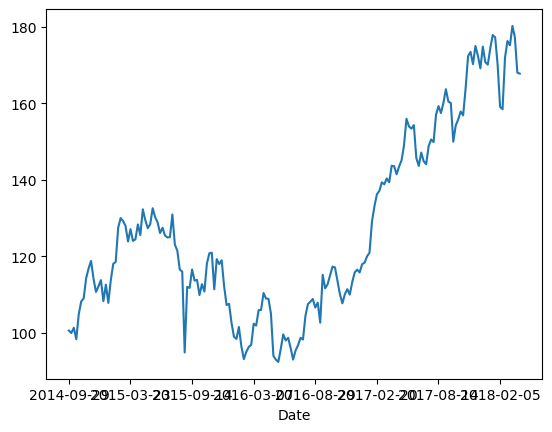

In [109]:
data['Open'].plot()

In [110]:
data.index[:5]

Index(['2014-09-29', '2014-10-06', '2014-10-13', '2014-10-20', '2014-10-27'], dtype='object', name='Date')

In [111]:
pd.DatetimeIndex(data.index)

DatetimeIndex(['2014-09-29', '2014-10-06', '2014-10-13', '2014-10-20',
               '2014-10-27', '2014-11-03', '2014-11-10', '2014-11-17',
               '2014-11-24', '2014-12-01',
               ...
               '2018-01-29', '2018-02-05', '2018-02-12', '2018-02-19',
               '2018-02-26', '2018-03-05', '2018-03-12', '2018-03-19',
               '2018-03-26', '2018-03-29'],
              dtype='datetime64[ns]', name='Date', length=184, freq=None)

In [112]:
# Using DatetimeIndex function to transform index into date:
data.index = pd.DatetimeIndex(data.index)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600
...,...,...,...,...,...,...
2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700
2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500
2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700


<Axes: xlabel='Date'>

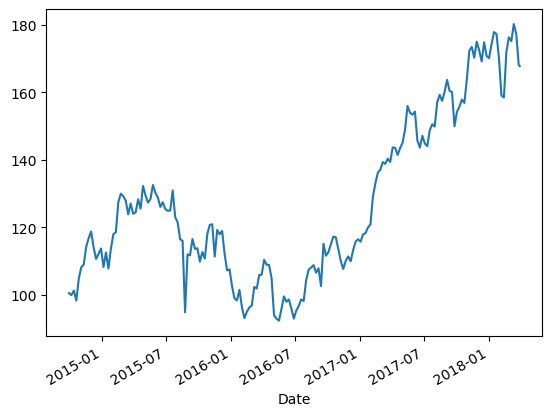

In [113]:
data['Open'].plot()

## Date Ranges
If we're entering time series data into a DataFrame, it will often be useful to create a range of dates using `date_range`. We can create it with different frequencies by specifying `freq`. 

Days in a specific range:

In [114]:
pd.date_range(start="3/1/2023", end="3/1/2025", freq="D")

DatetimeIndex(['2023-03-01', '2023-03-02', '2023-03-03', '2023-03-04',
               '2023-03-05', '2023-03-06', '2023-03-07', '2023-03-08',
               '2023-03-09', '2023-03-10',
               ...
               '2025-02-20', '2025-02-21', '2025-02-22', '2025-02-23',
               '2025-02-24', '2025-02-25', '2025-02-26', '2025-02-27',
               '2025-02-28', '2025-03-01'],
              dtype='datetime64[ns]', length=732, freq='D')

In [115]:
pd.date_range(start="3/1/2023", end="3/1/2025", freq="B")

DatetimeIndex(['2023-03-01', '2023-03-02', '2023-03-03', '2023-03-06',
               '2023-03-07', '2023-03-08', '2023-03-09', '2023-03-10',
               '2023-03-13', '2023-03-14',
               ...
               '2025-02-17', '2025-02-18', '2025-02-19', '2025-02-20',
               '2025-02-21', '2025-02-24', '2025-02-25', '2025-02-26',
               '2025-02-27', '2025-02-28'],
              dtype='datetime64[ns]', length=523, freq='B')

In [116]:
pd.date_range(start="3/1/2023", periods=30, freq="B")

DatetimeIndex(['2023-03-01', '2023-03-02', '2023-03-03', '2023-03-06',
               '2023-03-07', '2023-03-08', '2023-03-09', '2023-03-10',
               '2023-03-13', '2023-03-14', '2023-03-15', '2023-03-16',
               '2023-03-17', '2023-03-20', '2023-03-21', '2023-03-22',
               '2023-03-23', '2023-03-24', '2023-03-27', '2023-03-28',
               '2023-03-29', '2023-03-30', '2023-03-31', '2023-04-03',
               '2023-04-04', '2023-04-05', '2023-04-06', '2023-04-07',
               '2023-04-10', '2023-04-11'],
              dtype='datetime64[ns]', freq='B')

In [117]:
data = data.reset_index()
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       184 non-null    datetime64[ns]
 1   Open       184 non-null    float64       
 2   High       184 non-null    float64       
 3   Low        184 non-null    float64       
 4   Close      184 non-null    float64       
 5   Adj Close  184 non-null    float64       
 6   Volume     184 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 10.2 KB


In [119]:
# Extract year
data['Date'].dt.year

0      2014
1      2014
2      2014
3      2014
4      2014
       ... 
179    2018
180    2018
181    2018
182    2018
183    2018
Name: Date, Length: 184, dtype: int32

In [120]:
# Extract month
data.Date.dt.month

0       9
1      10
2      10
3      10
4      10
       ..
179     3
180     3
181     3
182     3
183     3
Name: Date, Length: 184, dtype: int32

----
End of Code